# Assignment Title (Lab 2) : Employee Attrition Prediction Using Machine Learning Decision Trees

**NAME: NAKIIBINGE Gideon**

**REG. NO.: 2023/HD05/04696U**

**STUDENT NO.: 2300704696**

**MASTER OF SCIENCE IN COMPUTER SCIENCE - (MCSC)**

## **Introduction**

Attrition in business can mean the reduction in staff and employees in a company through normal means, such as retirement and resignation, the loss of customers or clients to old age or growing out of the company’s target demographic.Employers generally consider attrition a loss of valuable employees and talent. However, there is more to attrition than a shrinking workforce. As employees leave an organization, they take with them much-needed skills and qualifications that they developed during their tenure. On the other hand, junior professionals with promising qualifications can then succeed into higher level positions or business owners can introduce more diversity in experience or expertise. Accordingly, there are benefits and disadvantages to attrition.Waiting for attrition naturally is usually better for company morale. However, it can also have a negative impact on the employees that remain if the duties from the eliminated positions are transferred to them with no pay increase. It can also limit promotions within the company if these jobs are eliminated, which can result in further attrition and turnover.

###  Importing important libraries

In [3]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency, f_oneway




In [4]:
# Importing the data
df = pd.read_csv('/home/gideon/Downloads/employee_attrition_dataset.csv')

In [5]:
# Taking a glance of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Taking a glance at the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Taking a glance at the null values in the data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Dataset Overview

**1470 observations**

**Dependent Variable :** Attrition

**Independent Variable (34 different variables in total) :**

**Basic Info:**

Age, Gender, Education, Education Field, Martial Status, Distance From Home

**Work Info:**

Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level, Job Involvement

**Statisfaction:**

Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction

**Salary Related:**

Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike

**Time Related:**

Total Working Years,Traning Time Last Year,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Current Manager,Num Companies Worked



 ### ** This is complete data set that contain no missing values and duplicates , there two data types , objects and integers , and we shall need to tranform them to numeric forms**


# Exploratary Data Analysis, EDA

## Distribution for attrition 

/tmp/ipykernel_18335/1697399857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2")


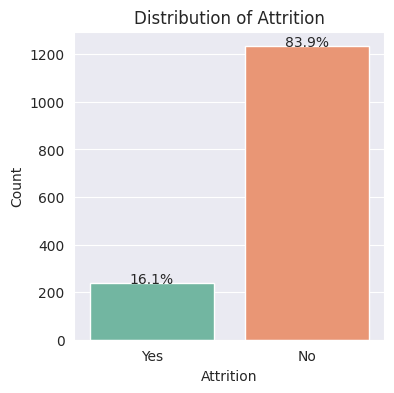

In [9]:

# Creating  a count plot for attrition
plt.figure(figsize=(4, 4))
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Distribution of Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")

# Annotate the bars with counts
total = len(df)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center')
   # plt.gca().annotate(int(p.get_height()), (x, y - 10), ha='center')

plt.show()

The figure illustrates the distribution of attrition among the sample population, with 16% of the  employees  choosing to leave the company, while 83.9% employees decided to stay.
The variable is higly imbalanced and so we expect to have baise in our model towards the majority class that is "No"

# Distribution of the Numerical Variables 

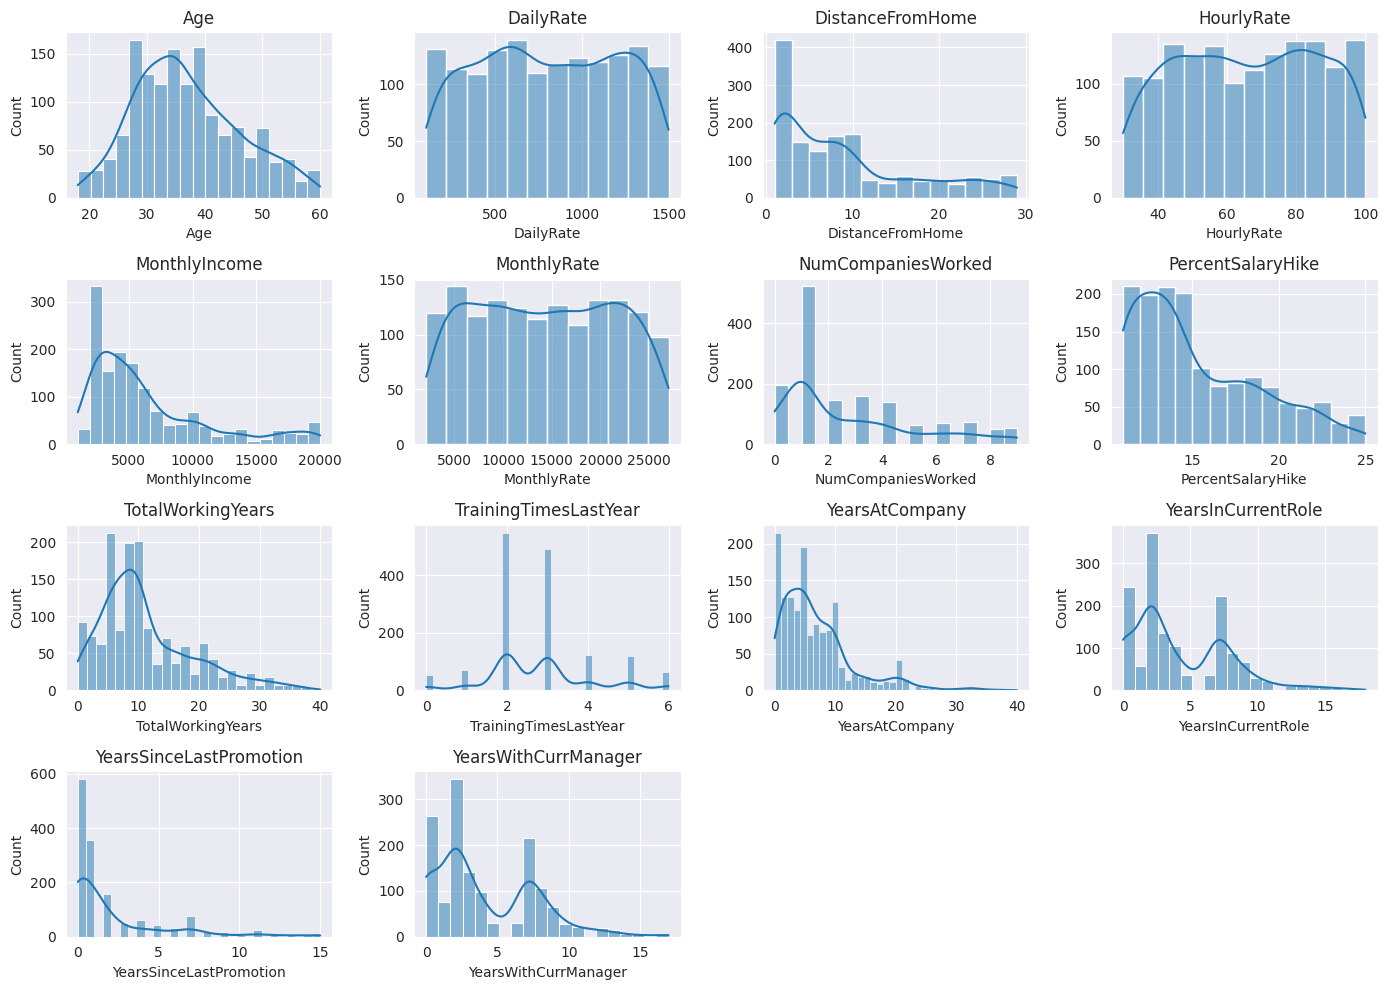

               Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810   802.485714          9.192517    65.891156    6502.931293   
std       9.135373   403.509100          8.106864    20.329428    4707.956783   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    83.750000    8379.000000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
count   1470.000000         1470.000000        1470.000000        1470.000000   
mean   14313.103401            2.693197          15.209524          11.279592   
std     7117.786044        

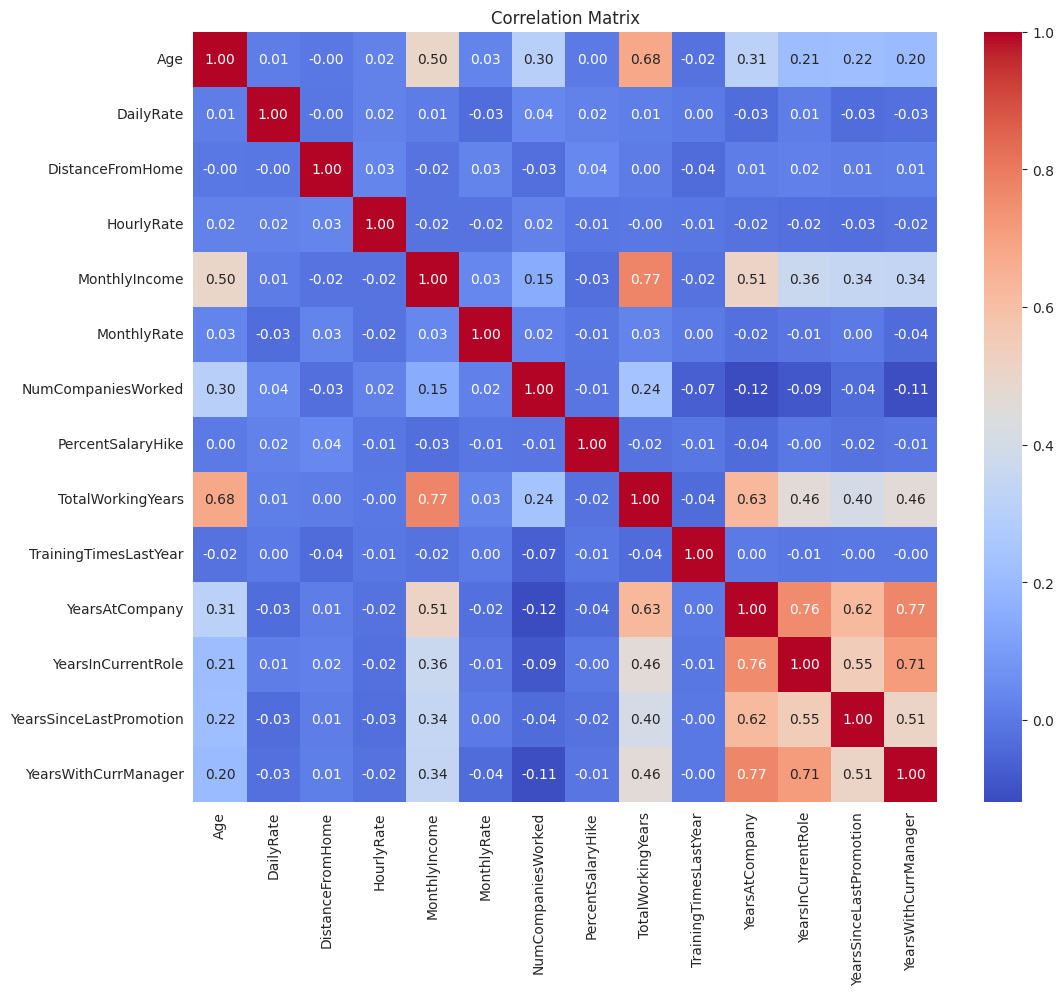

In [10]:
# List of specified continuous variables
continuous_vars = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Subset the data to only include the specified continuous variables
data_continuous = df[continuous_vars]

# Plot histograms for each continuous variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_continuous[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

# Summary statistics for the continuous variables
print(data_continuous.describe())

# Correlation matrix for the continuous variables
correlation_matrix = data_continuous.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Here we discover interesting information.
1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we could definitely drop it as well.
3. Column 'Over18' is another interesting column which tells us every employee in this dataset is over 18 and we will drop it as well.
4. Column 'EmployeeNumber' is a unique number linked with 1 employee only and we shall drop it
5.  Findings of Numerical Features

    Age: The age distribution of this data set distributed normally which cover from 20 to 60. Most employees are 30 to 40.
    DistanceFromHome: Most of employees live close to company which most distance are below 10km.
    MonthlyIncome: The majority of monthly income of employees are centred at around 5000. Only a few of people get high income over 10000.
    NumCompaniesWorked: Most employees only worked for one company.
    TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: These time type data are right skewed which most of people stay in company only for a few years.
    DailyRate, HourlyRate, MonthlyRate distributed uniformly which the figure is similar in different intervals.
6. Findings of Correlation Analysis

    Time type of features (Years at company, in current role, since last promotion and with current manager) are quite correlated to each other .
    Besides, total working year is also correlated to monthly income as we imagined.
    Most of features are not correlated to each other, so we do not have to deal with that. As for time type of features, we will consider that whether to alter them according to the machine learning model.







# Distribution of the Norminal Variables

/tmp/ipykernel_18335/4106823762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2")
/tmp/ipykernel_18335/4106823762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2")
/tmp/ipykernel_18335/4106823762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2")
/tmp/ipykernel_18335/4106823762.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

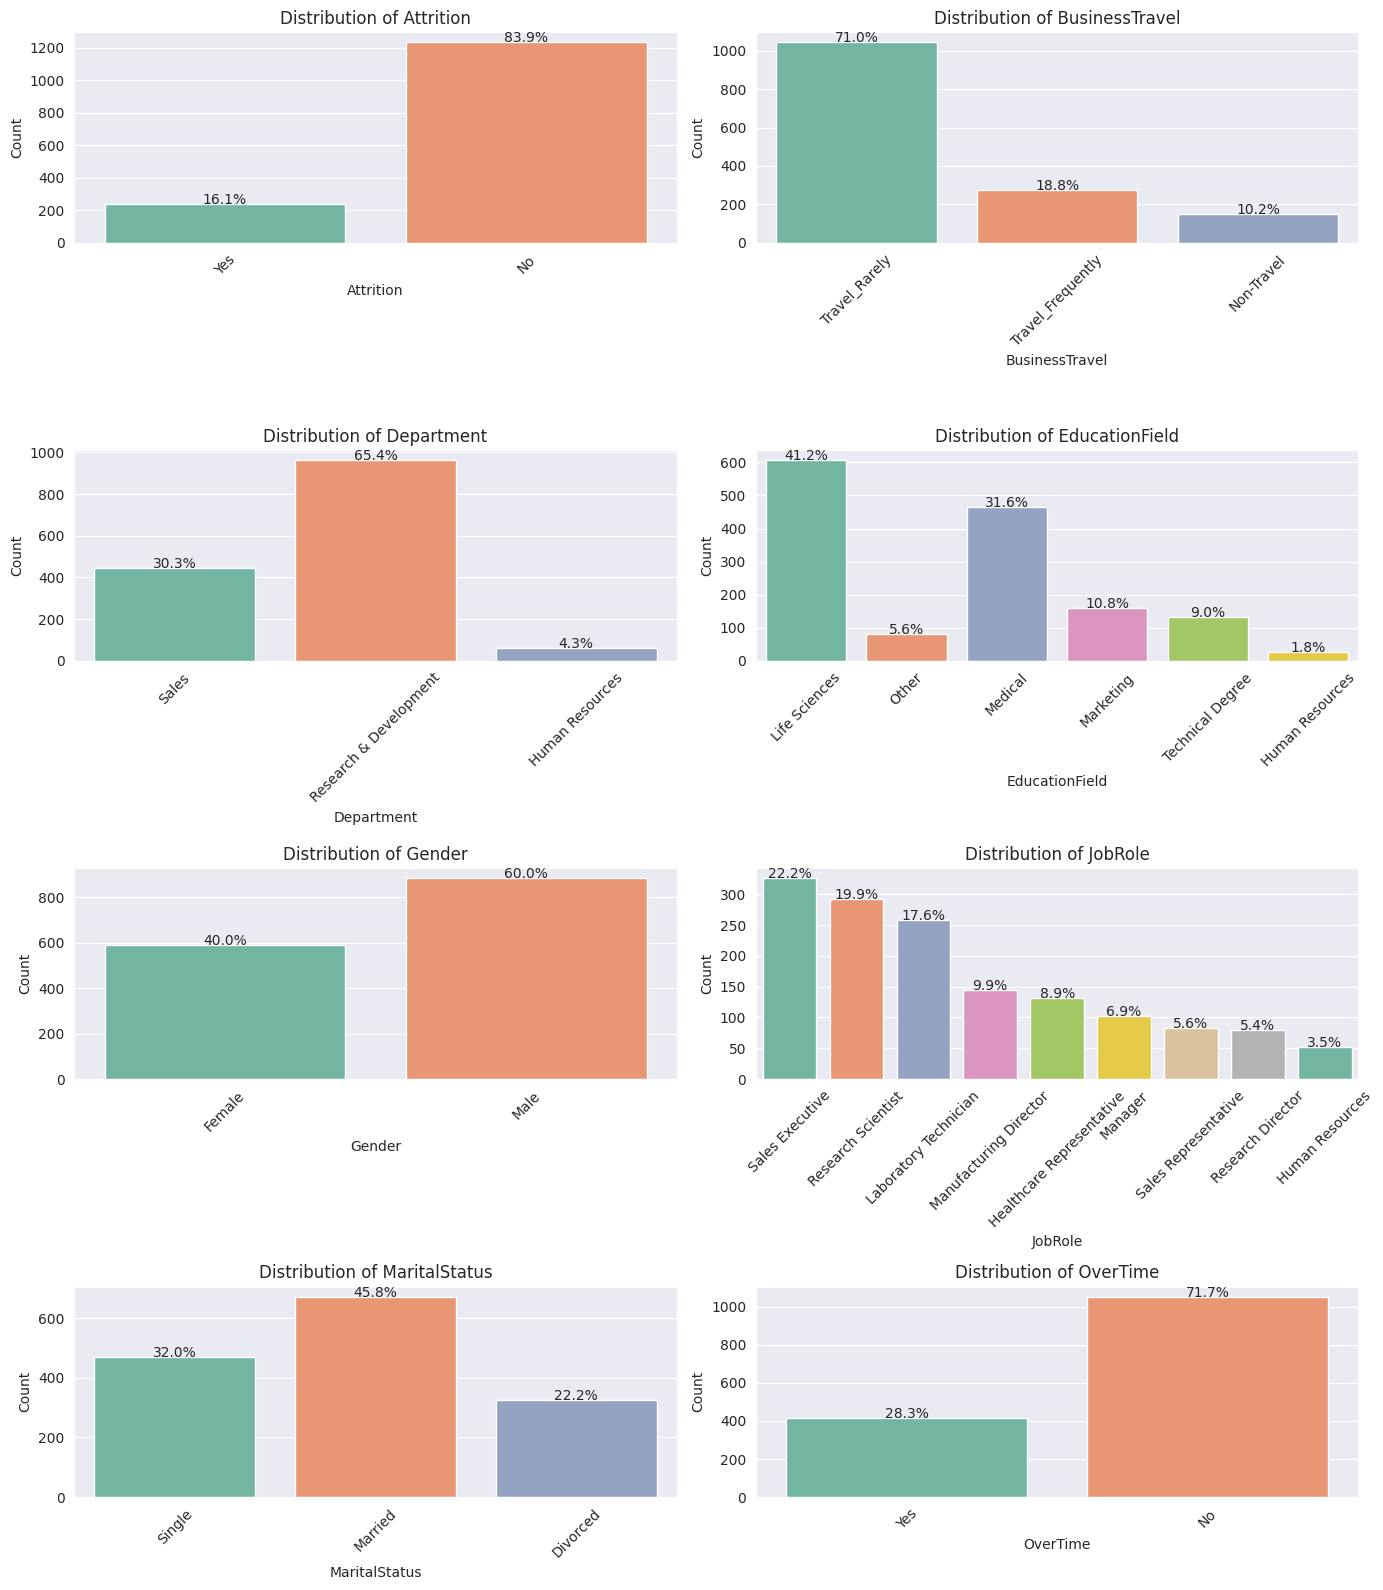

In [11]:
# List of specified nominal variables
nominal_vars = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Create count plots for each nominal variable
plt.figure(figsize=(14, 16))
for i, var in enumerate(nominal_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=var, data=df, palette="Set2")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

# Annotate the bars with counts
for ax in plt.gcf().axes:
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
        #ax.annotate(int(p.get_height()), (x, y - 10), ha='center')

plt.tight_layout()
plt.show()

# Distribution of the Ordinal Variables 

/tmp/ipykernel_18335/3523566127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2", order=df[var].value_counts().index)
/tmp/ipykernel_18335/3523566127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2", order=df[var].value_counts().index)
/tmp/ipykernel_18335/3523566127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="Set2", order=df[var].value_counts().index)
/tmp/ipykernel_18335/3523566127.py:12: FutureWarning: 

Passing `palette` without 

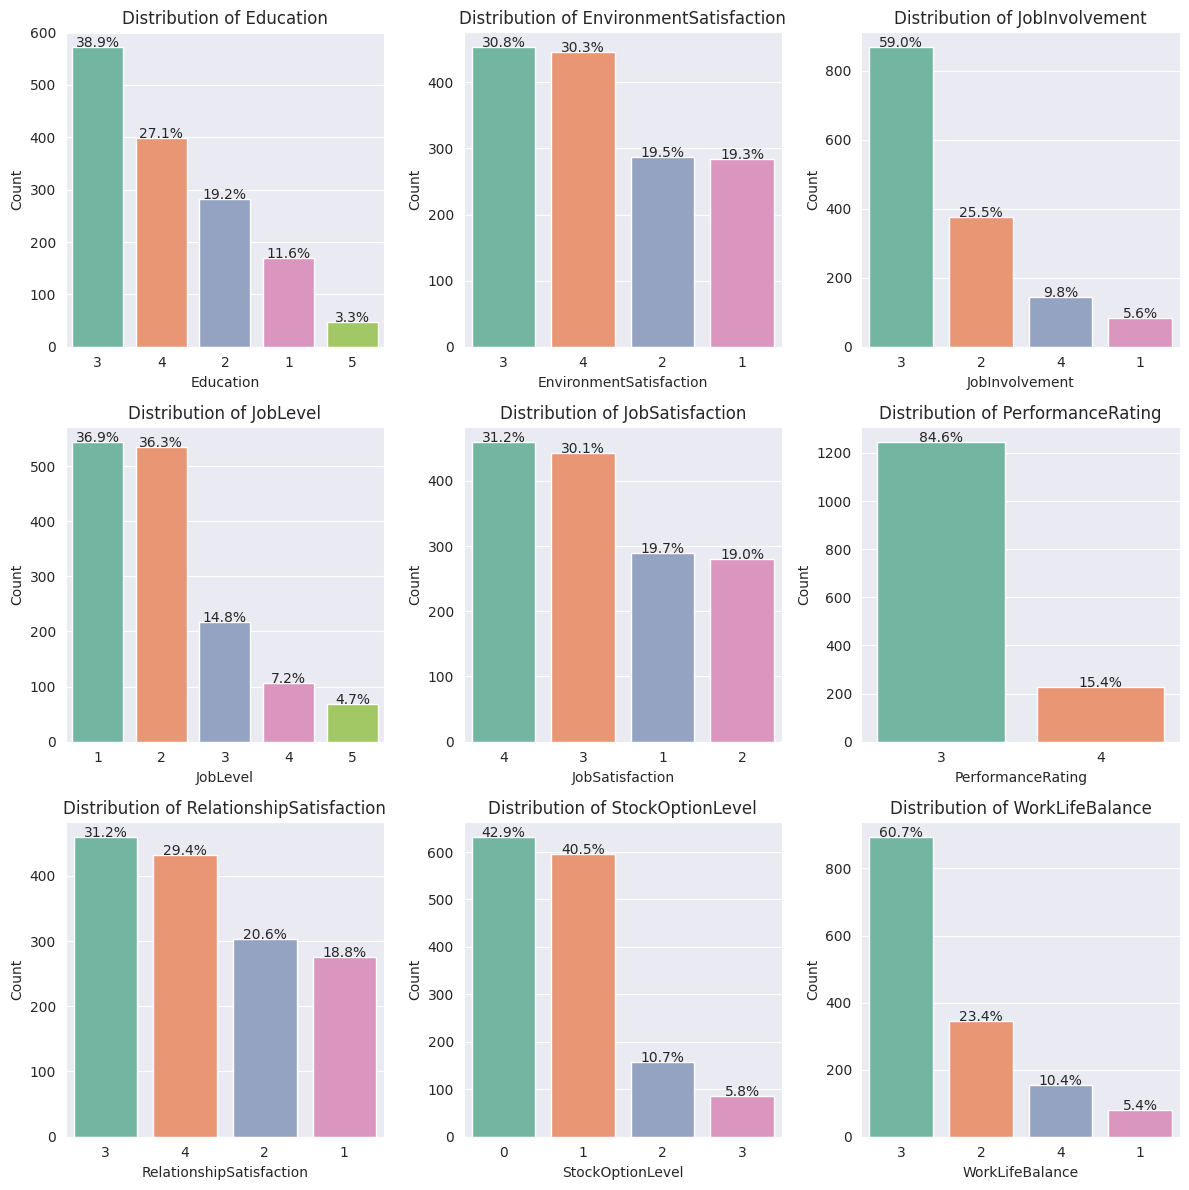

In [12]:
# List of specified ordinal variables
ordinal_vars = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'WorkLifeBalance'
]

# Create count plots for each ordinal variable
plt.figure(figsize=(12, 12))
for i, var in enumerate(ordinal_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette="Set2", order=df[var].value_counts().index)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")

# Annotate the bars with counts
for ax in plt.gcf().axes:
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
       # ax.annotate(int(p.get_height()), (x, y - 10), ha='center')

plt.tight_layout()
plt.show()


1. Findings of Categorical Features

    In terms of satisfaction (enviroment, job and relationship satisfaction), most of employees are satisfied, which the number of "3" and "4" indicate high satisfaction are a lot.
    Most employees hold bachelor degree and many people major in life science.
    Since that most of employees are relative new to company, job level 1 is the majority job level.
    Job involment is pretty high among employees.



# Dropping the redundant features

In [13]:
# Columns to drop
columns_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Now, the data_cleaned DataFrame does not include the dropped columns.


# BIvariate Analysis : How the independent Variables relate to the dependent variables 

### Relationship between the continous variables and the Attrition

/tmp/ipykernel_18335/1332112190.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=var, data=df, palette="Set2")
/tmp/ipykernel_18335/1332112190.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=var, data=df, palette="Set2")
/tmp/ipykernel_18335/1332112190.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y=var, data=df, palette="Set2")
/tmp/ipykernel_18335/1332112190.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

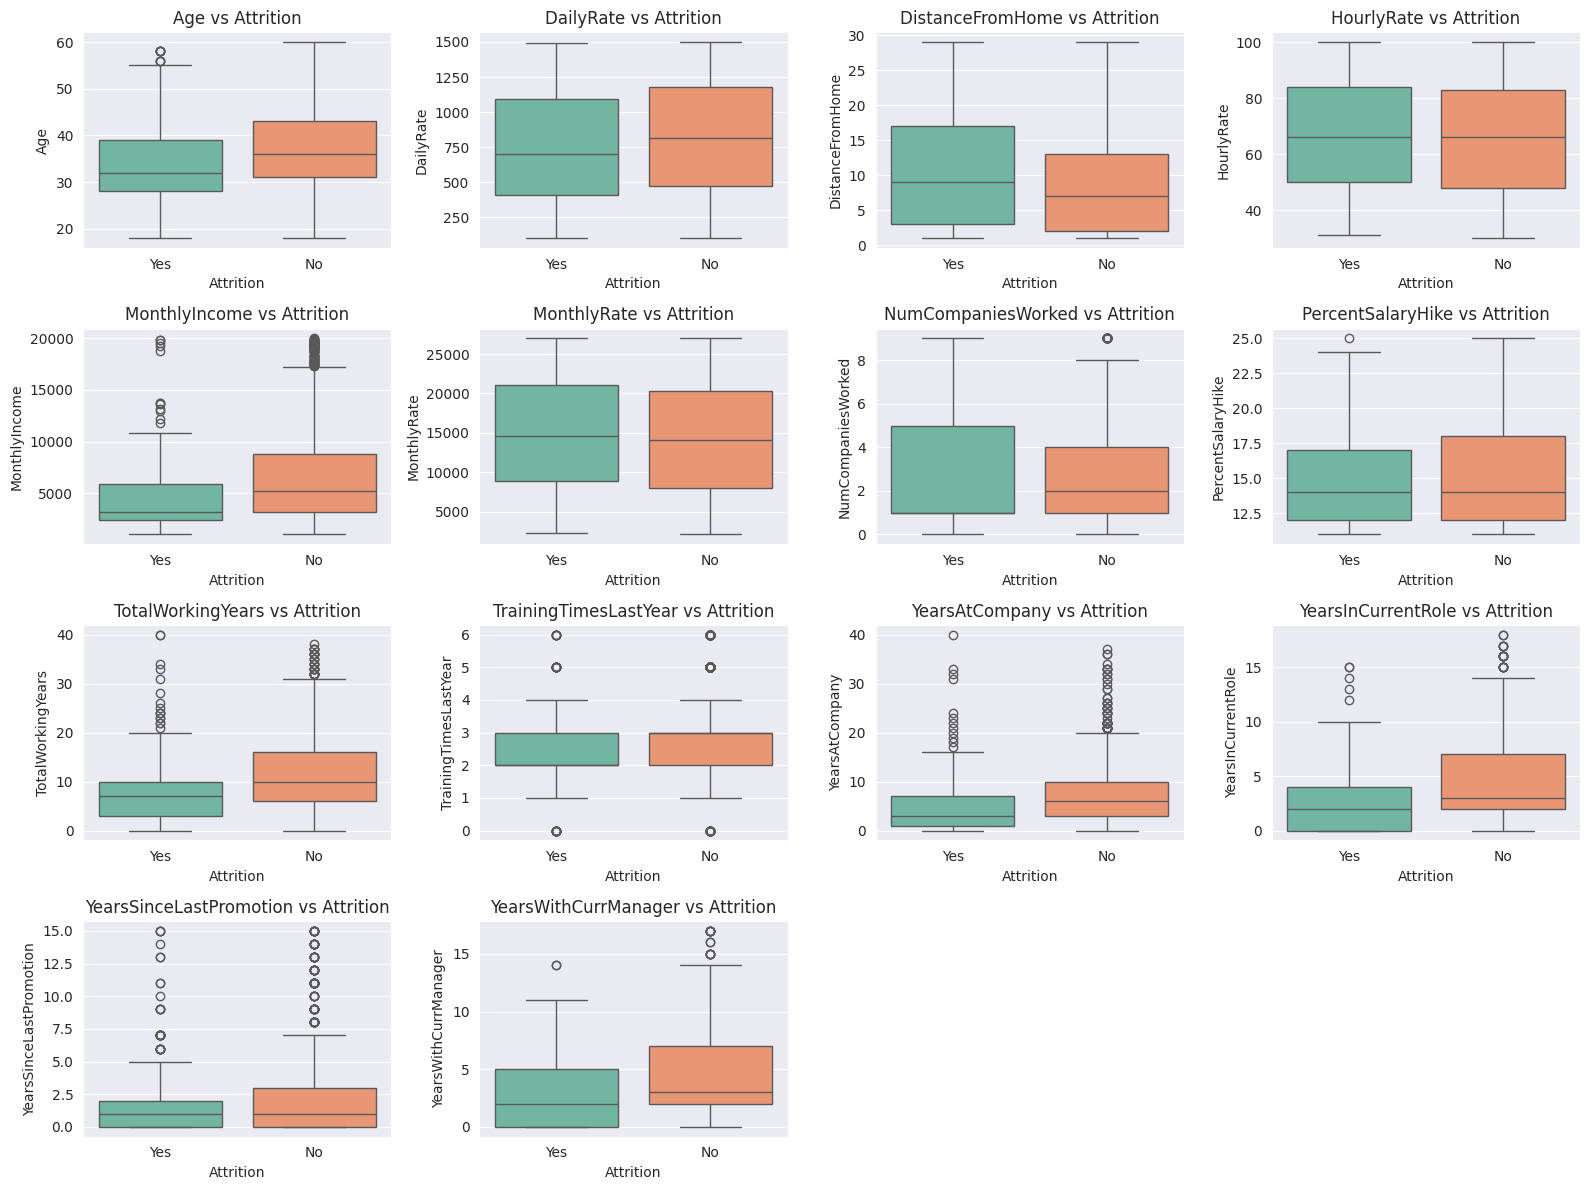

In [14]:
# Select continuous variables
continuous_vars = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create box plots for the continuous variables with respect to Attrition
plt.figure(figsize=(16, 12))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x="Attrition", y=var, data=df, palette="Set2")
    plt.title(f"{var} vs Attrition")
    plt.xlabel("Attrition")
    plt.ylabel(var)

plt.tight_layout()
plt.show()



### Findings of Cross Analysis between Attrition and Numerical Features

    Age: Younger employees are tend to leave compared to elder employees.
    DistanceFromHome: Those who live far from company have more possibility to leave.
    MonthlyIncome: Most income of attrition employee are below 5000 while those who's income is higher than 5000 tend to stay.
    NumCompaniesWorked, Time type of features: People who worked for many companies and worked for many years are likely to stay.


### Relationship between the Norminal variables and the Attrition


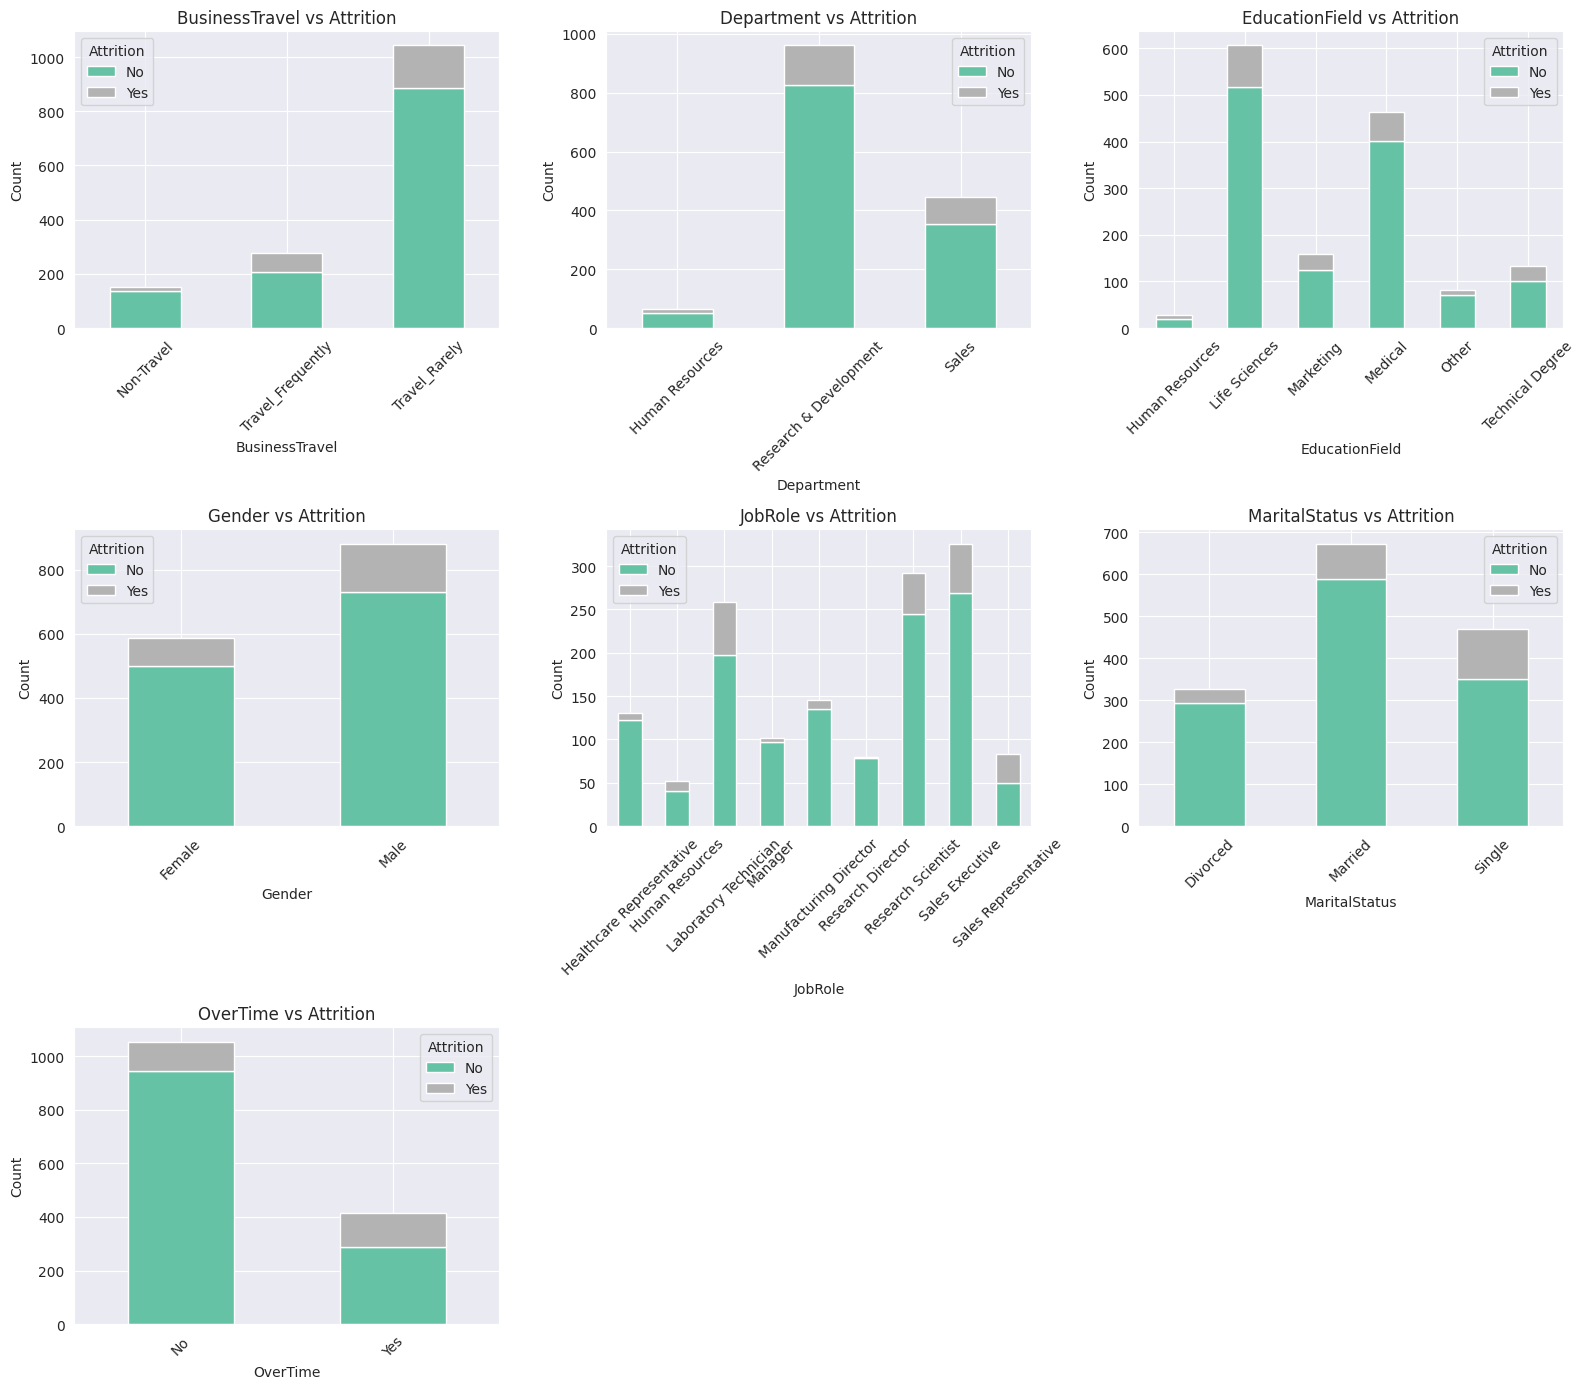

In [15]:
# List of specified nominal variables
nominal_vars = [
  'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Create stacked bar plots for each nominal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(nominal_vars, 1):
    plt.subplot(3, 3, i)
    data_grouped = df.groupby([var, 'Attrition']).size().unstack()
    data_grouped.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
    plt.title(f"{var} vs Attrition")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    
    # Add a legend
    plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### Findings of Cross Analysis between Attrition and Categorical Features

    Those who has business travel are more likely leave the company.
    Employees of Human Resource are the most stable group of employees.
    Employees who have Doctor degree are stable.
    Enviroment satisfaction is not related a lot to attrition.
    The higher job level is, the less possibility that employess leave.
    Technical employees are tend to leave.
    Low performance rating and low stock option level may result employees' attrition.


### Relationship between the Ordinal variables and the Attrition


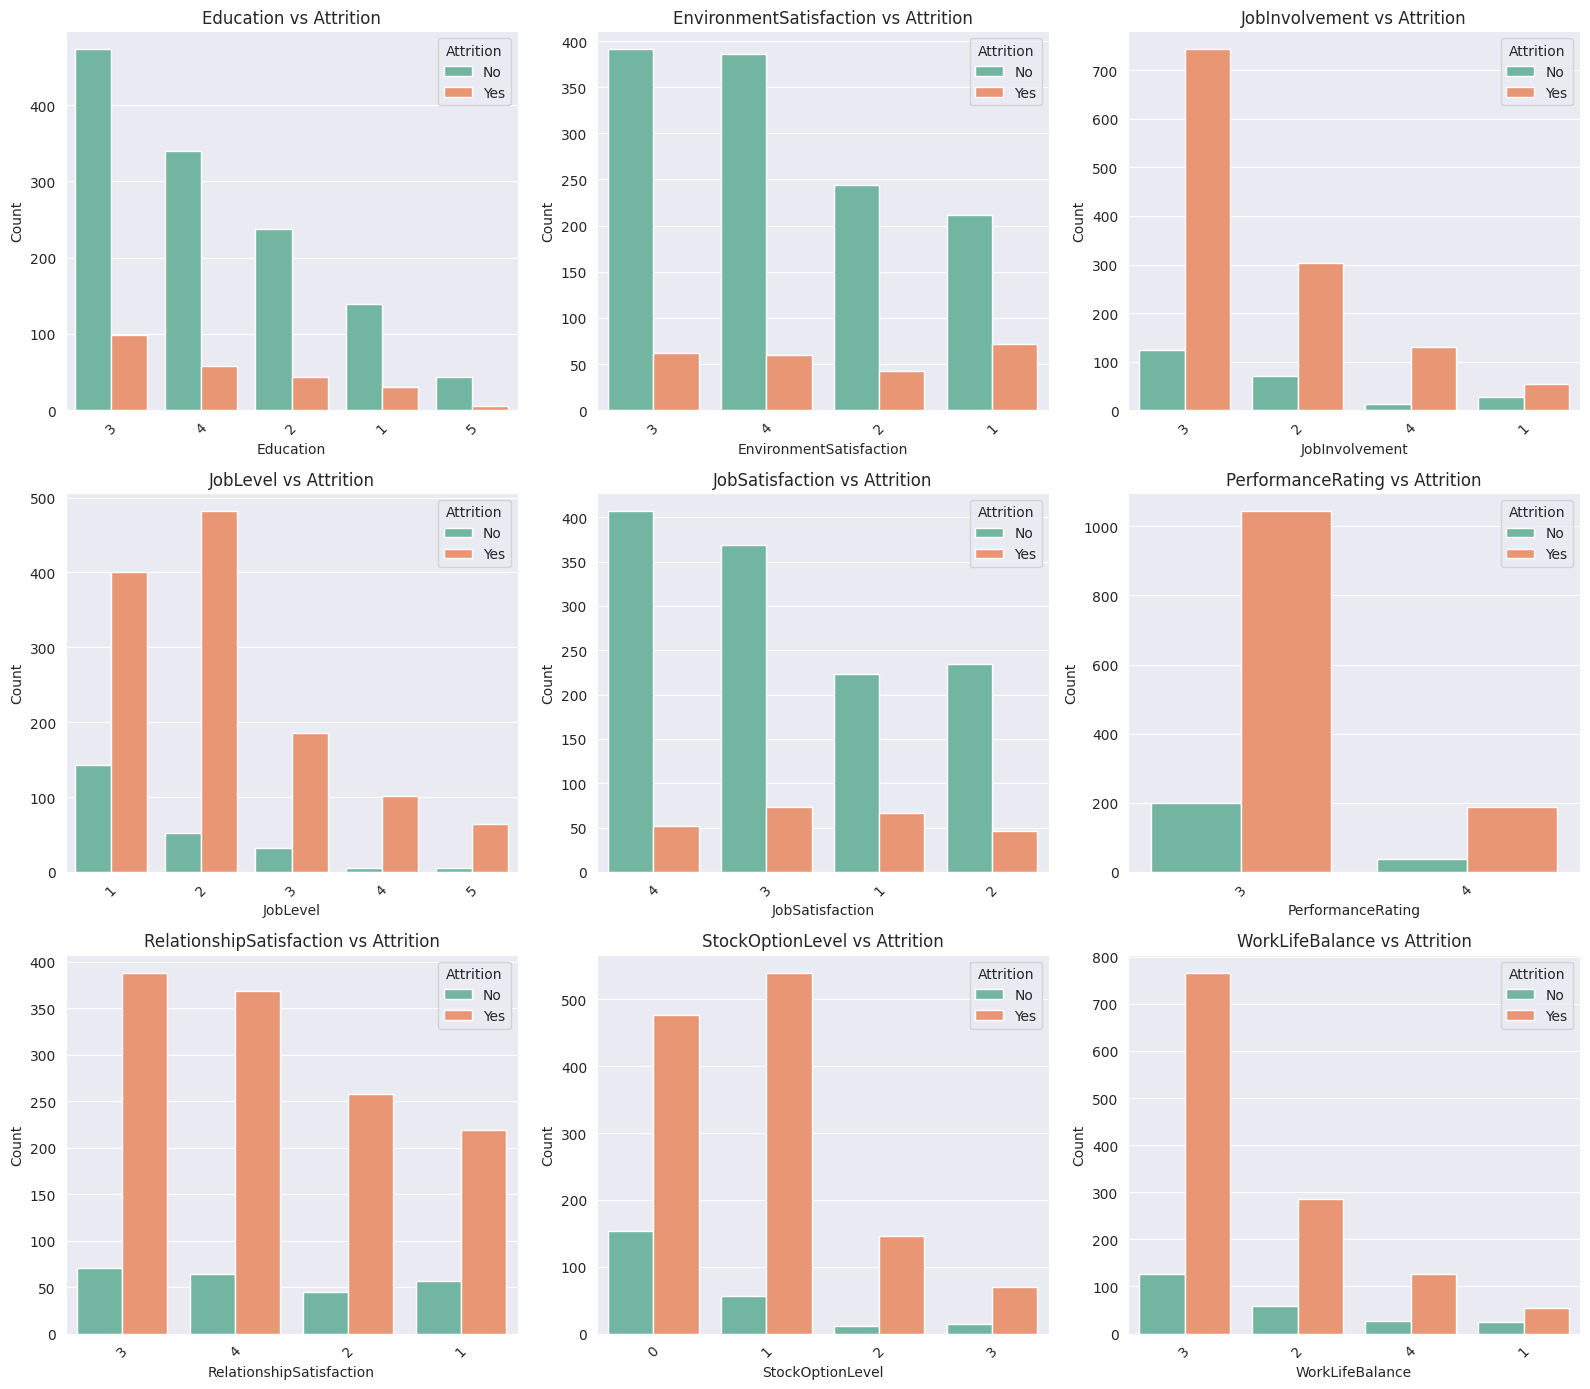

In [16]:
# List of specified ordinal variables
ordinal_vars = [
     'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Create grouped bar plots for each ordinal variable with respect to Attrition
plt.figure(figsize=(16, 14))
for i, var in enumerate(ordinal_vars, 1):
    if var == 'Attrition':
        continue  # Skip 'Attrition' in the loop

    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue="Attrition", data=df, palette="Set2", order=df[var].value_counts().index)
    plt.title(f"{var} vs Attrition")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Encoding the categorical variables 

In [17]:
object_columns = ['Attrition','BusinessTravel', 'Gender', 'OverTime','MaritalStatus','Department','EducationField','JobRole']
le = LabelEncoder()
for column in object_columns:
    df[column] = le.fit_transform(df[column])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

## First Model building with Feature selection

## Feature Selection 

In [19]:
# Separate features into nominal/ordinal and continuous variables
nominal_ordinal_vars = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',
                           'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']]
continuous_vars = df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                     'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Assuming 'Attrition' is the target variable
attrition = df['Attrition']



In [24]:
# Calculate chi-square values for nominal/ordinal variables
chi2_values = {}
for column in nominal_ordinal_vars.columns:
    observed = pd.crosstab(nominal_ordinal_vars[column], attrition)
    chi2, _, _, _ = chi2_contingency(observed)
    chi2_values[column] = chi2

# Create a Series from the chi-square values
chi2_results = pd.Series(chi2_values)
sorted_chi2 = sorted(chi2_results.items(), key=lambda x: x[1], reverse=True)
# Display chi-square results
print("Chi-Square Results:")
print(chi2_results)

Chi-Square Results:
BusinessTravel              24.182414
Department                  10.796007
EducationField              16.024674
Gender                       1.116967
JobRole                     86.190254
MaritalStatus               46.163677
OverTime                    87.564294
Education                    3.073961
EnvironmentSatisfaction     22.503881
JobInvolvement              28.492021
JobLevel                    72.529013
JobSatisfaction             17.505077
PerformanceRating            0.000155
RelationshipSatisfaction     5.241068
StockOptionLevel            60.598301
WorkLifeBalance             16.325097
dtype: float64


In [25]:
# Calculate ANOVA F-statistic and p-values for continuous variables
# Create dictionaries to store chi-square values and ANOVA results
anova_results = {}
for column in continuous_vars.columns:
    group_labels = df['Attrition'].unique()
    groups = [continuous_vars[df['Attrition'] == label][column] for label in group_labels]
    f_statistic, p_value = f_oneway(*groups)
    anova_results[column] = {'F_Statistic': f_statistic, 'P_Value': p_value}

#sorted_anova = sorted(anova_results.items(), key=lambda x: x[1]['F_Statistic'], reverse=True)
print("\nANOVA Results:")
for feature, stats in anova_results.items():
    print(f"{feature}: F-Statistic = {stats['F_Statistic']:.2f}, P-Value = {stats['P_Value']:.4f}")



ANOVA Results:
Age: F-Statistic = 38.18, P-Value = 0.0000
DailyRate: F-Statistic = 4.73, P-Value = 0.0299
DistanceFromHome: F-Statistic = 8.97, P-Value = 0.0028
HourlyRate: F-Statistic = 0.07, P-Value = 0.7931
MonthlyIncome: F-Statistic = 38.49, P-Value = 0.0000
MonthlyRate: F-Statistic = 0.34, P-Value = 0.5611
NumCompaniesWorked: F-Statistic = 2.78, P-Value = 0.0955
PercentSalaryHike: F-Statistic = 0.27, P-Value = 0.6056
TotalWorkingYears: F-Statistic = 44.25, P-Value = 0.0000
TrainingTimesLastYear: F-Statistic = 5.21, P-Value = 0.0226
YearsAtCompany: F-Statistic = 27.00, P-Value = 0.0000
YearsInCurrentRole: F-Statistic = 38.84, P-Value = 0.0000
YearsSinceLastPromotion: F-Statistic = 1.60, P-Value = 0.2058
YearsWithCurrManager: F-Statistic = 36.71, P-Value = 0.0000


If this p-value is less than α = .05, we reject the null hypothesis of the ANOVA and conclude that there is a statistically significant difference between the means of the two groups. Otherwise, if the p-value is not less than α = .05 then we fail to reject the null hypothesis and conclude that we do not have sufficient evidence to say that there is a statistically significant difference between the means of the three groups.

The larger the F-statistic, the greater the variation between sample means relative to the variation within the samples.

In [26]:
# Columns to drop
columns_to_drop1 = ['PercentSalaryHike', 'HourlyRate', 'PerformanceRating']

# Drop the specified columns
df = df.drop(columns=columns_to_drop1)

In [27]:
# Define the target variable
target_variable = "Attrition"

# Select the features (excluding the target variable)
features = df.drop(columns=[target_variable])

# Select the target variable
target = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.79

Confusion Matrix:
[[218  37]
 [ 26  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       255
           1       0.26      0.33      0.29        39

    accuracy                           0.79       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.81      0.79      0.80       294


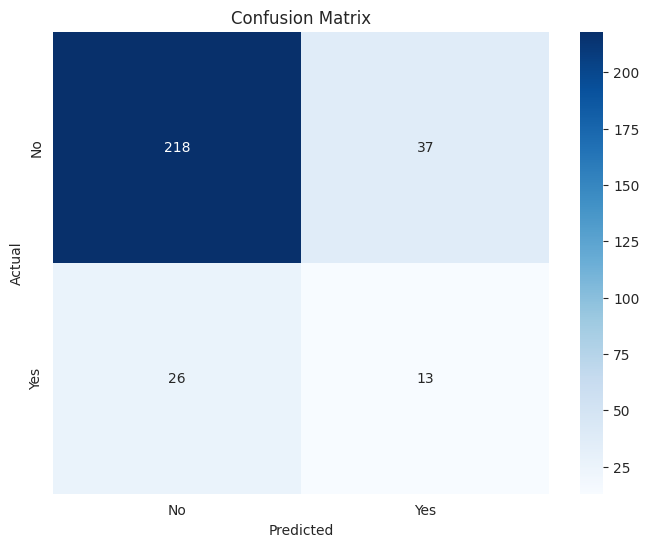

In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Building the model with feature Importance and balanced target

### Balancing Attrition

In [29]:
# Print the class distribution before resampling
print("Class distribution before resampling:", target.value_counts())

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Print the class distribution after resampling
print("Class distribution after resampling:", target_resampled.value_counts())



Class distribution before resampling: Attrition
0    1233
1     237
Name: count, dtype: int64
Class distribution after resampling: Attrition
1    1233
0    1233
Name: count, dtype: int64


## Feature Importance 

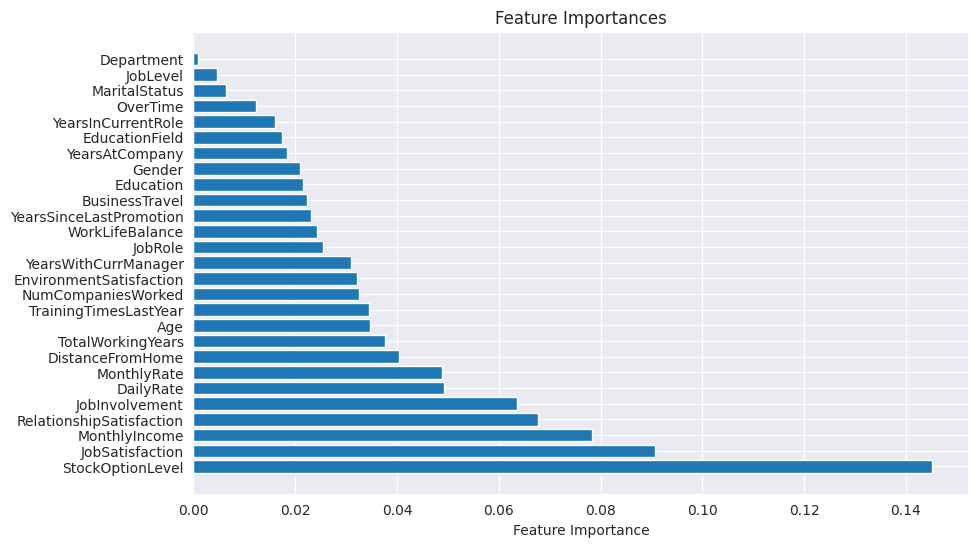

In [30]:
# Initialize a Decision Tree Classifier for feature importance
clf = DecisionTreeClassifier(random_state=42)
clf.fit(features_resampled, target_resampled)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance (e.g., select the top 1% of features)
threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


## Looking at the selected features

In [31]:
print(selected_features)


19            StockOptionLevel
12             JobSatisfaction
14               MonthlyIncome
18    RelationshipSatisfaction
9               JobInvolvement
2                    DailyRate
15                 MonthlyRate
4             DistanceFromHome
20           TotalWorkingYears
0                          Age
21       TrainingTimesLastYear
16          NumCompaniesWorked
7      EnvironmentSatisfaction
26        YearsWithCurrManager
11                     JobRole
22             WorkLifeBalance
25     YearsSinceLastPromotion
1               BusinessTravel
5                    Education
8                       Gender
23              YearsAtCompany
6               EducationField
24          YearsInCurrentRole
17                    OverTime
Name: Feature, dtype: object


## Retrain Decision Tree with Selected Features:


In [32]:
# Select only the relevant features for the retraining
X_selected = features_resampled[selected_features]

# Initialize a new Decision Tree Classifier with selected features
clf_selected = DecisionTreeClassifier(random_state=42)
clf_selected.fit(X_selected, target_resampled)

DecisionTreeClassifier(random_state=42)

## Generate report

In [33]:
# Split the data into training and testing sets for the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, target_resampled, test_size=0.2, random_state=42)

# Make predictions on the test set using clf_selected (the model with selected features)
y_pred = clf_selected.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display classification report
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:\n", class_report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       250
         Yes       1.00      1.00      1.00       244

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494


## Hyper parameter Tunning

In [34]:
# Initialize a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to retrain the model
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display classification report
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Classification Report:\n", class_report)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.79      0.81       250
         Yes       0.79      0.84      0.82       244

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494


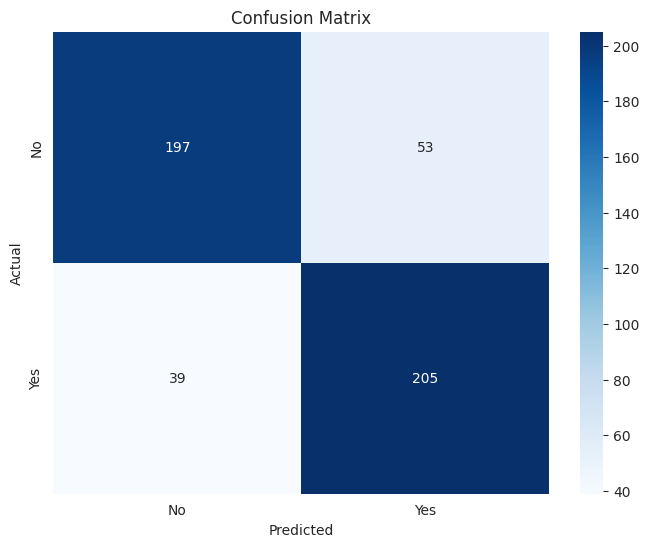

In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

 Compared with the model trained from training set without oversampling, those oversampled training set will help to generate better model with high score in terms of precision, recall, f1-score. Because in a company, attrition will cause much more loss than doing something to detain employees. So, whether can distinguish all employees who want to leave is significant. Hence, we need to consider the AUC value and recall rate for ‘Yes’ class. As for feature importance acquired from SVM, working overtime is the most significant reason to attrion. Then, Laboratory Technician and Sales Representative have more possibility to leave. Besides, those who’s education background is human resource are also tend to leave.